In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
df = pd.read_csv('Health_Science_Dataset_csv.csv', header = 1)
df.head()

Data As Of  Start Week    End Week  MMWRyear  MMWRweek Week Ending Date  \
0  11/02/2023  12/29/2019  01/04/2020      2020         1       01/04/2020   
1  11/02/2023  12/29/2019  01/04/2020      2020         1       01/04/2020   
2  11/02/2023  12/29/2019  01/04/2020      2020         1       01/04/2020   
3  11/02/2023  12/29/2019  01/04/2020      2020         1       01/04/2020   
4  11/02/2023  12/29/2019  01/04/2020      2020         1       01/04/2020   

     Group    Indicator   Jurisdiction          Age Group  COVID-19 Deaths  \
0  By Week  Week-ending  United States           All Ages              0.0   
1  By Week  Week-ending  United States         0-17 years              0.0   
2  By Week  Week-ending  United States        18-64 years              0.0   
3  By Week  Week-ending  United States  65 years and over              0.0   
4  By Week  Week-ending        Alabama           All Ages              0.0   

   Total Deaths  Pneumonia Deaths  Influenza Deaths  Pneumonia or Influenza  \
0       60028.0            4102.0             432.0                  4534.0   
1         667.0              19.0              22.0                    41.0   
2       14706.0             767.0             183.0                   950.0   
3       44655.0            3316.0             227.0                  3543.0   
4        1098.0              67.0               NaN                    72.0   

   Pneumonia, Influenza, or COVID-19 Deaths  
0                                    4534.0  
1                                      41.0  
2                                     950.0  
3                                    3543.0  
4                                      72.0

Notice the columns:
- Date As Of
- Group
- Indicator
all values are the same

Therefore, we begin cleaning the dataset appropriately below

In [9]:
# Remove the first columns
nodate_df = df.iloc[:,1:16]

# Remove the other two columns
cleaned_df = df.drop(['Group', 'Indicator'], axis = 1)
cleaned_df = cleaned_df[cleaned_df['Age Group'] == 'All Ages']
cleaned_df

Data As Of  Start Week    End Week  MMWRyear  MMWRweek  \
0      11/02/2023  12/29/2019  01/04/2020      2020         1   
4      11/02/2023  12/29/2019  01/04/2020      2020         1   
8      11/02/2023  12/29/2019  01/04/2020      2020         1   
12     11/02/2023  12/29/2019  01/04/2020      2020         1   
16     11/02/2023  12/29/2019  01/04/2020      2020         1   
...           ...         ...         ...       ...       ...   
50380  11/02/2023  10/22/2023  10/28/2023      2023        43   
50384  11/02/2023  10/22/2023  10/28/2023      2023        43   
50388  11/02/2023  10/22/2023  10/28/2023      2023        43   
50392  11/02/2023  10/22/2023  10/28/2023      2023        43   
50396  11/02/2023  10/22/2023  10/28/2023      2023        43   

      Week Ending Date   Jurisdiction Age Group  COVID-19 Deaths  \
0           01/04/2020  United States  All Ages              0.0   
4           01/04/2020        Alabama  All Ages              0.0   
8           01/04/2020         Alaska  All Ages              0.0   
12          01/04/2020        Arizona  All Ages              0.0   
16          01/04/2020       Arkansas  All Ages              0.0   
...                ...            ...       ...              ...   
50380       10/28/2023   HHS Region 6  All Ages             39.0   
50384       10/28/2023   HHS Region 7  All Ages             32.0   
50388       10/28/2023   HHS Region 8  All Ages             19.0   
50392       10/28/2023   HHS Region 9  All Ages             44.0   
50396       10/28/2023  HHS Region 10  All Ages             14.0   

       Total Deaths  Pneumonia Deaths  Influenza Deaths  \
0           60028.0            4102.0             432.0   
4            1098.0              67.0               NaN   
8              91.0               NaN               NaN   
12           1278.0              83.0               NaN   
16            697.0              57.0               NaN   
...             ...               ...               ...   
50380        1773.0             116.0               NaN   
50384        1212.0              66.0               NaN   
50388         534.0              32.0               0.0   
50392        2351.0             145.0               NaN   
50396         435.0              26.0               0.0   

       Pneumonia or Influenza  Pneumonia, Influenza, or COVID-19 Deaths  
0                      4534.0                                    4534.0  
4                        72.0                                      72.0  
8                         NaN                                       NaN  
12                       87.0                                      87.0  
16                       63.0                                      63.0  
...                       ...                                       ...  
50380                   117.0                                     141.0  
50384                    67.0                                      87.0  
50388                    32.0                                      44.0  
50392                   147.0                                     174.0  
50396                    26.0                                      36.0  

[12600 rows x 14 columns]

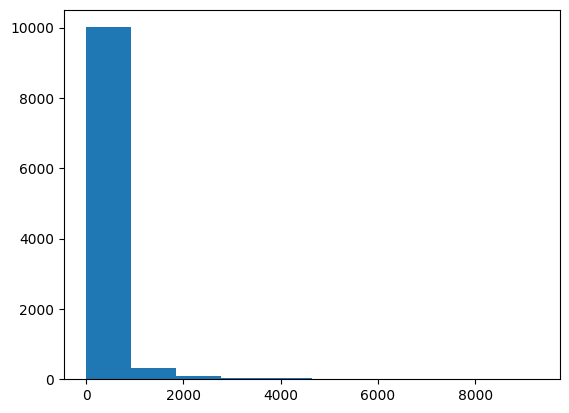

In [10]:
total_death_df = df[df['Age Group'] == 'All Ages']
jd_death_df = total_death_df[total_death_df['Jurisdiction'] != 'United States']

plt.hist(jd_death_df['COVID-19 Deaths'])
plt.show()

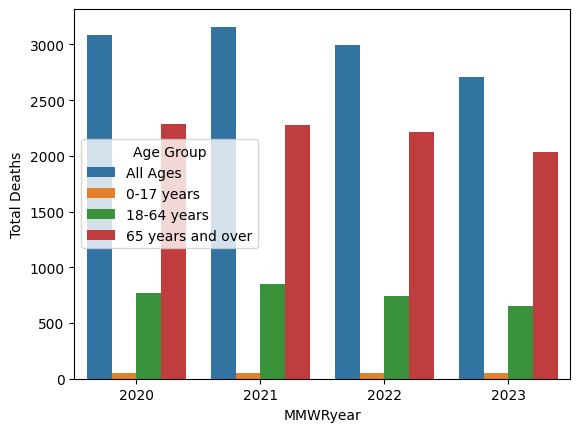

In [49]:
sns.barplot(data = df, x = 'MMWRyear', y ='Total Deaths', hue = 'Age Group', errorbar = ('ci', False))
plt.show()

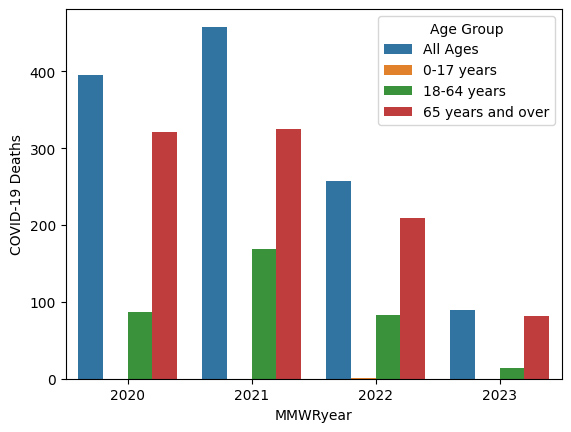

In [50]:
sns.barplot(data = df, x = 'MMWRyear', y ='COVID-19 Deaths', hue = 'Age Group', errorbar = ('ci', False))
plt.show()

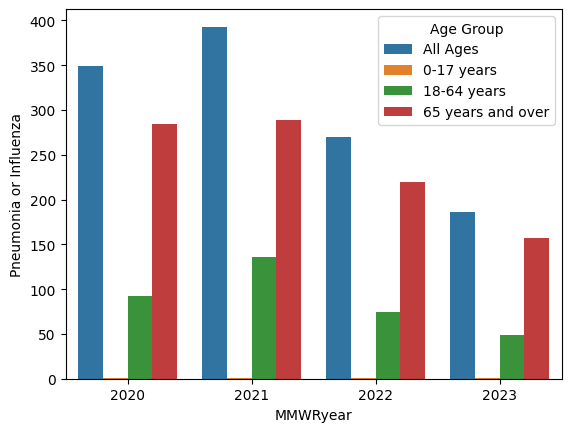

In [51]:
sns.barplot(data = df, x = 'MMWRyear', y ='Pneumonia or Influenza', hue = 'Age Group', errorbar = ('ci', False))
plt.show()

In [11]:
time_df = pd.read_csv('Health_Data_Cleaned_monthseason.csv')
time_df.head()

startWeek     endWeek weekEndingDate  MMWRyear  MMWRweek   Jurisdiction  \
0  2019-12-29  2020-01-04     2020-01-04      2020         1  United States   
1  2019-12-29  2020-01-04     2020-01-04      2020         1  United States   
2  2019-12-29  2020-01-04     2020-01-04      2020         1  United States   
3  2019-12-29  2020-01-04     2020-01-04      2020         1  United States   
4  2019-12-29  2020-01-04     2020-01-04      2020         1        Alabama   

           Age_Group  covidDeaths  totalDeaths  Pnuemonia_Deaths  Flu_Deaths  \
0           All Ages          0.0      60028.0            4102.0       432.0   
1         0-17 years          0.0        667.0              19.0        22.0   
2        18-64 years          0.0      14706.0             767.0       183.0   
3  65 years and over          0.0      44655.0            3316.0       227.0   
4           All Ages          0.0       1098.0              67.0         NaN   

   PnuemoniaORInfluenza  Pnuemonia_FLU_orCVD_Deaths    Month  Season  
0                4534.0                      4534.0  January  Winter  
1                  41.0                        41.0  January  Winter  
2                 950.0                       950.0  January  Winter  
3                3543.0                      3543.0  January  Winter  
4                  72.0                        72.0  January  Winter

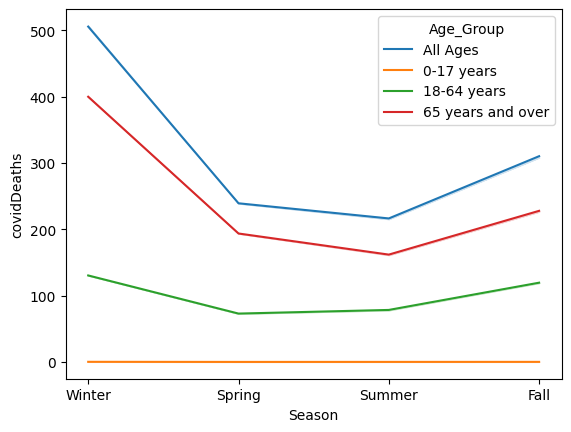

In [12]:
sns.lineplot(data = time_df, x = 'Season', y = 'covidDeaths', hue = 'Age_Group', errorbar = ('ci', False))
plt.show()

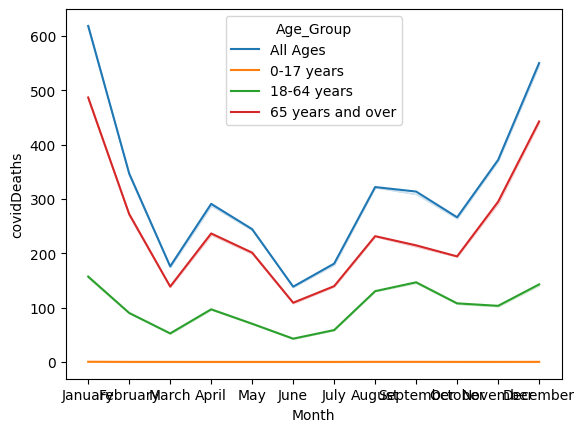

In [13]:
sns.lineplot(data = time_df, x = 'Month', y = 'covidDeaths', hue = 'Age_Group', errorbar = ('ci', False))
plt.show()

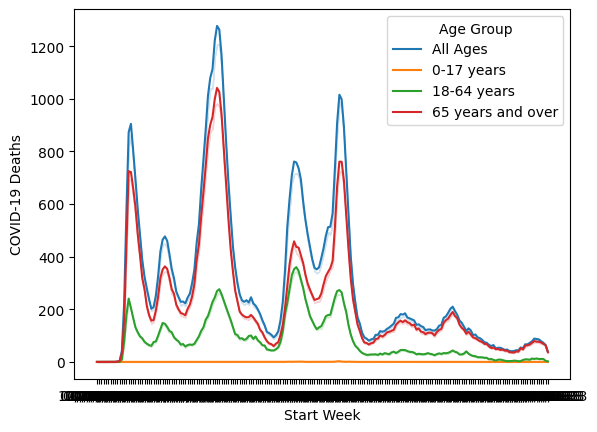

In [14]:
sns.lineplot(data = df, x = 'Start Week', y = 'COVID-19 Deaths', hue = 'Age Group', errorbar = ('ci', False))
plt.show()

state_names = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "District of Columbia", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]


In [156]:
hhs1_df = df[(df['Jurisdiction'] == 'HHS Region 1') & (df['Age Group'] == 'All Ages')]
hhs2_df = df[(df['Jurisdiction'] == 'HHS Region 2') & (df['Age Group'] == 'All Ages')]
hhs3_df = df[(df['Jurisdiction'] == 'HHS Region 3') & (df['Age Group'] == 'All Ages')]
hhs4_df = df[(df['Jurisdiction'] == 'HHS Region 4') & (df['Age Group'] == 'All Ages')]
hhs5_df = df[(df['Jurisdiction'] == 'HHS Region 5') & (df['Age Group'] == 'All Ages')]
hhs6_df = df[(df['Jurisdiction'] == 'HHS Region 6') & (df['Age Group'] == 'All Ages')]
hhs7_df = df[(df['Jurisdiction'] == 'HHS Region 7') & (df['Age Group'] == 'All Ages')]
hhs8_df = df[(df['Jurisdiction'] == 'HHS Region 8') & (df['Age Group'] == 'All Ages')]
hhs9_df = df[(df['Jurisdiction'] == 'HHS Region 9') & (df['Age Group'] == 'All Ages')]
hhs10_df = df[(df['Jurisdiction'] == 'HHS Region 10') & (df['Age Group'] == 'All Ages')]

hhs_list = [hhs1_df, hhs2_df, hhs3_df, hhs4_df, hhs5_df, hhs6_df, hhs7_df, hhs8_df, hhs9_df, hhs10_df]

hhs_df = pd.concat(hhs_list, ignore_index=True) 
hhs_df.shape

(2000, 16)

In [138]:
ny_df = df[(df['Jurisdiction'] == 'New York') & (df['Age Group'] == 'All Ages')]
ca_df = df[(df['Jurisdiction'] == 'California') & (df['Age Group'] == 'All Ages')]
fl_df = df[(df['Jurisdiction'] == 'Florida') & (df['Age Group'] == 'All Ages')]
nc_df = df[(df['Jurisdiction'] == 'North Carolina') & (df['Age Group'] == 'All Ages')]
tx_df = df[(df['Jurisdiction'] == 'Texas') & (df['Age Group'] == 'All Ages')]
al_df = df[(df['Jurisdiction'] == 'Alabama') & (df['Age Group'] == 'All Ages')]
pa_df = df[(df['Jurisdiction'] == 'Pennsylvania') & (df['Age Group'] == 'All Ages')]
# hhs8_df = df[(df['Jurisdiction'] == 'HHS Region 8') & (df['Age Group'] == 'All Ages')]
# hhs9_df = df[(df['Jurisdiction'] == 'HHS Region 9') & (df['Age Group'] == 'All Ages')]
# hhs10_df = df[(df['Jurisdiction'] == 'HHS Region 10') & (df['Age Group'] == 'All Ages')]

state_list = [ny_df, ca_df, fl_df, nc_df, tx_df, al_df, pa_df]
state_df = pd.concat(state_list, ignore_index=True) 
state_df.shape

#pa_df.head()

Data As Of  Start Week    End Week  MMWRyear  MMWRweek Week Ending Date  \
160   11/02/2023  12/29/2019  01/04/2020      2020         1       01/04/2020   
412   11/02/2023  01/05/2020  01/11/2020      2020         2       01/11/2020   
664   11/02/2023  01/12/2020  01/18/2020      2020         3       01/18/2020   
916   11/02/2023  01/19/2020  01/25/2020      2020         4       01/25/2020   
1168  11/02/2023  01/26/2020  02/01/2020      2020         5       02/01/2020   

        Group    Indicator  Jurisdiction Age Group  COVID-19 Deaths  \
160   By Week  Week-ending  Pennsylvania  All Ages              0.0   
412   By Week  Week-ending  Pennsylvania  All Ages              0.0   
664   By Week  Week-ending  Pennsylvania  All Ages              0.0   
916   By Week  Week-ending  Pennsylvania  All Ages              0.0   
1168  By Week  Week-ending  Pennsylvania  All Ages              0.0   

      Total Deaths  Pneumonia Deaths  Influenza Deaths  \
160         2772.0             168.0              17.0   
412         2812.0             153.0              19.0   
664         2848.0             162.0              14.0   
916         2769.0             178.0              20.0   
1168        2767.0             167.0              12.0   

      Pneumonia or Influenza  Pneumonia, Influenza, or COVID-19 Deaths  
160                    185.0                                     185.0  
412                    172.0                                     172.0  
664                    176.0                                     176.0  
916                    198.0                                     198.0  
1168                   179.0                                     179.0

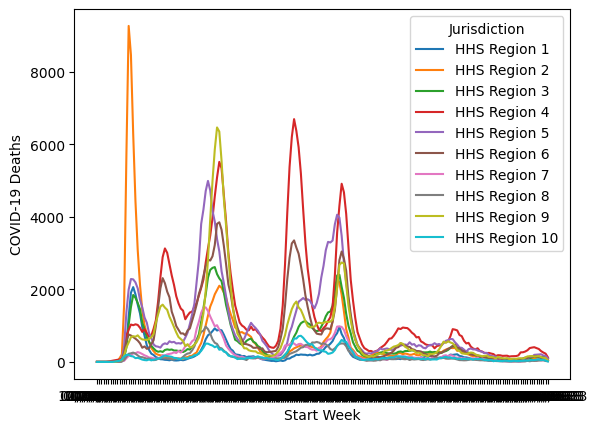

In [139]:
hhs_plot = sns.lineplot(data = hhs_df, x = 'Start Week', y = 'COVID-19 Deaths', hue = 'Jurisdiction', errorbar = ('ci', False))
plt.show()

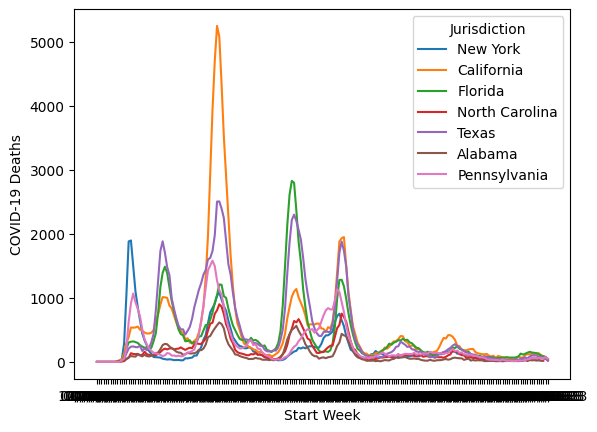

In [140]:
hhs_plot = sns.lineplot(data = state_df, x = 'Start Week', y = 'COVID-19 Deaths', hue = 'Jurisdiction', errorbar = ('ci', False))
plt.show()

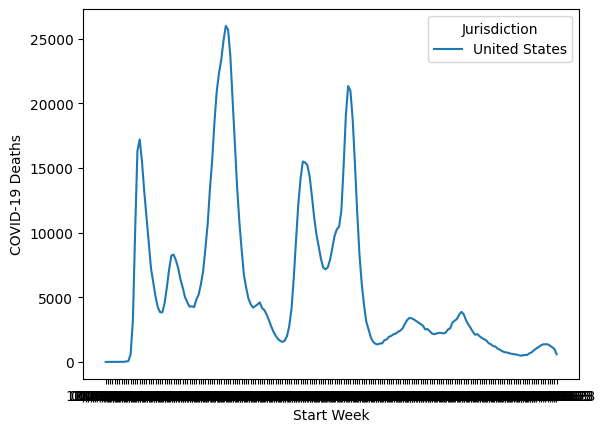

In [107]:
us_df = df[(df['Jurisdiction'] == 'United States') & (df['Age Group'] == 'All Ages')]
sns.lineplot(data = us_df, x = 'Start Week', y = 'COVID-19 Deaths', hue = 'Jurisdiction', errorbar = ('ci', False))
plt.show()

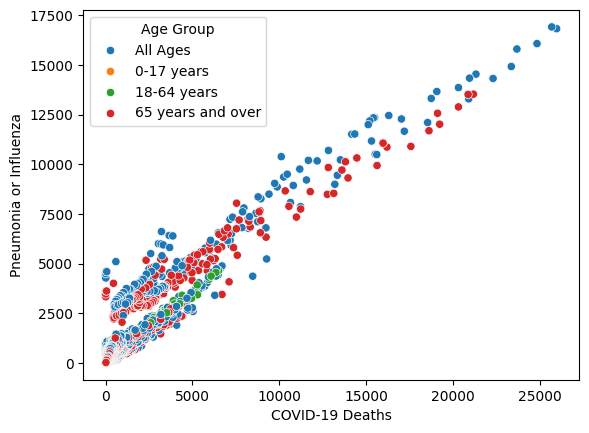

In [45]:
sns.scatterplot(data = df, x = 'COVID-19 Deaths', y = 'Pneumonia or Influenza', hue = 'Age Group')
plt.show()

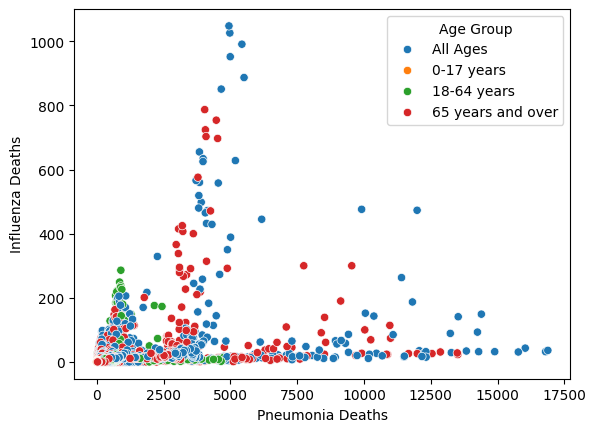

In [194]:
sns.scatterplot(data = df, x = 'Pneumonia Deaths', y = 'Influenza Deaths', hue = 'Age Group')
plt.show()

In [15]:
month_names = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
new_dates = []

for i in df['Start Week']:
    month_num = i[0:2]
    month_int = int(month_num)
    month = month_names[month_int - 1]
    new_dates.append(month + i[-4:len(i)])

df['Month Year'] = new_dates
df['Month Year']

0        DEC2019
1        DEC2019
2        DEC2019
3        DEC2019
4        DEC2019
          ...   
50395    OCT2023
50396    OCT2023
50397    OCT2023
50398    OCT2023
50399    OCT2023
Name: Month Year, Length: 50400, dtype: object

In [16]:
hhs1_df = df[(df['Jurisdiction'] == 'HHS Region 1') & (df['Age Group'] == 'All Ages')]
hhs2_df = df[(df['Jurisdiction'] == 'HHS Region 2') & (df['Age Group'] == 'All Ages')]
hhs3_df = df[(df['Jurisdiction'] == 'HHS Region 3') & (df['Age Group'] == 'All Ages')]
hhs4_df = df[(df['Jurisdiction'] == 'HHS Region 4') & (df['Age Group'] == 'All Ages')]
hhs5_df = df[(df['Jurisdiction'] == 'HHS Region 5') & (df['Age Group'] == 'All Ages')]
hhs6_df = df[(df['Jurisdiction'] == 'HHS Region 6') & (df['Age Group'] == 'All Ages')]
hhs7_df = df[(df['Jurisdiction'] == 'HHS Region 7') & (df['Age Group'] == 'All Ages')]
hhs8_df = df[(df['Jurisdiction'] == 'HHS Region 8') & (df['Age Group'] == 'All Ages')]
hhs9_df = df[(df['Jurisdiction'] == 'HHS Region 9') & (df['Age Group'] == 'All Ages')]
hhs10_df = df[(df['Jurisdiction'] == 'HHS Region 10') & (df['Age Group'] == 'All Ages')]

hhs_list = [hhs1_df, hhs2_df, hhs3_df, hhs4_df, hhs5_df, hhs6_df, hhs7_df, hhs8_df, hhs9_df, hhs10_df]

hhs_df = pd.concat(hhs_list, ignore_index=True) 
hhs_df.shape

(2000, 17)

In [6]:
hhs_plot = sns.lineplot(data = hhs_df, x = 'Month Year', y = 'COVID-19 Deaths', hue = 'Jurisdiction', errorbar = ('ci', False))
plt.xticks(rotation = 90, fontsize = 6)

# hhs_plot.set_xticks(['DEC2019', 'JAN2021'])
# hhs_plot.set_xticklabels(['DEC2019', 'JAN2021'])

plt.show()

NameError: name 'hhs_df' is not defined

In [ ]:
fig = px.choropleth(scope = 'usa')

In [103]:
temp = list(set(df['Jurisdiction']))
temp.sort()
print(temp)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'HHS Region 1', 'HHS Region 10', 'HHS Region 2', 'HHS Region 3', 'HHS Region 4', 'HHS Region 5', 'HHS Region 6', 'HHS Region 7', 'HHS Region 8', 'HHS Region 9', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'New York City', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'United States', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [144]:
def peak_date(state_name):
    state_info = df[df['Jurisdiction'] == state_name]
    interest_value = max(state_info['COVID-19 Deaths'])

    outlier = state_info[state_info['COVID-19 Deaths'] == interest_value]
    return print(f"{state_name} \n Report started {outlier['Start Week']} \n Report ended {outlier['End Week']}\n")


In [151]:
peak_date('New York')
peak_date('California')
peak_date('Texas')
peak_date('Florida')

New York 
 Report started 3912    04/12/2020
Name: Start Week, dtype: object 
 Report ended 3912    04/18/2020
Name: End Week, dtype: object

California 
 Report started 13376    01/03/2021
Name: Start Week, dtype: object 
 Report ended 13376    01/09/2021
Name: End Week, dtype: object

Texas 
 Report started 13788    01/10/2021
Name: Start Week, dtype: object 
 Report ended 13788    01/16/2021
Name: End Week, dtype: object

Florida 
 Report started 21712    08/22/2021
Name: Start Week, dtype: object 
 Report ended 21712    08/28/2021
Name: End Week, dtype: object



In [155]:
peak_date('New Jersey')
peak_date('HHS Region 2')
peak_date('HHS Region 9')
peak_date('HHS Region 4')

New Jersey 
 Report started 3904    04/12/2020
Name: Start Week, dtype: object 
 Report ended 3904    04/18/2020
Name: End Week, dtype: object

HHS Region 2 
 Report started 3744    04/05/2020
Name: Start Week, dtype: object 
 Report ended 3744    04/11/2020
Name: End Week, dtype: object

HHS Region 9 
 Report started 13600    01/03/2021
Name: Start Week, dtype: object 
 Report ended 13600    01/09/2021
Name: End Week, dtype: object

HHS Region 4 
 Report started 22148    08/29/2021
Name: Start Week, dtype: object 
 Report ended 22148    09/04/2021
Name: End Week, dtype: object



Create line plots by sorting states and HHS regions first

Arizona, California, Hawaii, Nevada, American Samoa, Commonwealth of the Northern Mariana Islands, Federated States of Micronesia, Guam, Marshall Islands, and Republic of Palau


In [18]:
hhs_regions = {'HHS1': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
               'HHS2': ['New Jersey', 'New York'],
               'HHS3': ['Delaware', 'District of Columbia', 'Maryland', 'Pennsylvania', 'Virginia', 'West Virginia'],
               'HHS4': ['Alabama', 'Florida', 'Georgia', 'Kentucky', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee'],
               'HHS5': ['Illinois', 'Indiana', 'Michigan', 'Minnesota', 'Ohio', 'Wisconsin'],
               'HHS6': ['Arkansas', 'Louisiana', 'New Mexico', 'Oklahoma', 'Texas'],
               'HHS7': ['Iowa', 'Kansas', 'Missouri', 'Nebraska'],
               'HHS8': ['Colorado', 'Montana', 'North Dakota', 'South Dakota', 'Utah', 'Wyoming'],
               'HHS9': ['Arizona', 'California', 'Hawaii', 'Nevada'],
               'HHS10': ['Alaska', 'Idaho', 'Oregon', 'Washington']}

In [19]:
hhs_keys = [i for i in hhs_regions.keys()]
hhs_keys

['HHS1',
 'HHS2',
 'HHS3',
 'HHS4',
 'HHS5',
 'HHS6',
 'HHS7',
 'HHS8',
 'HHS9',
 'HHS10']

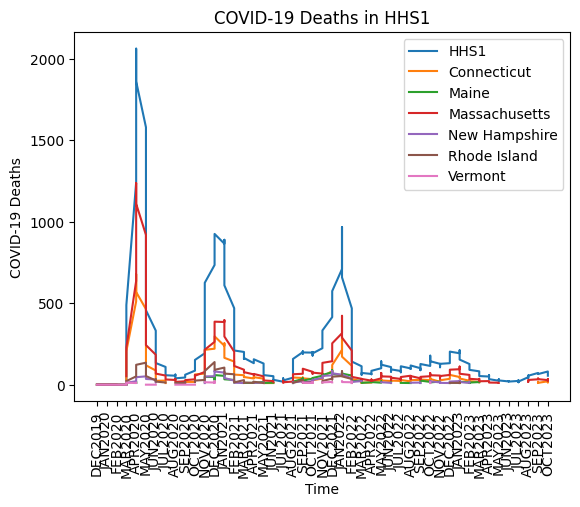

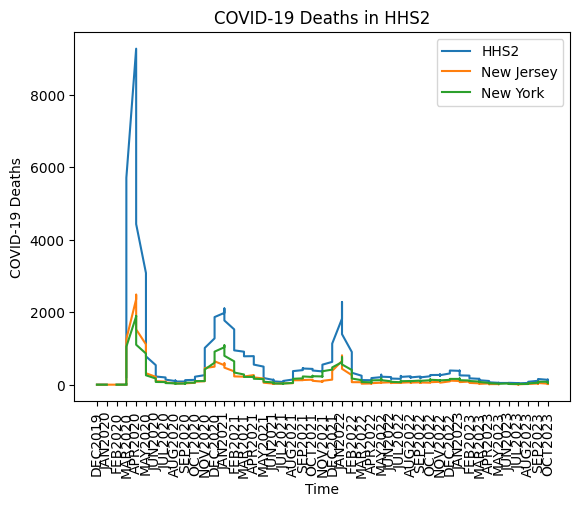

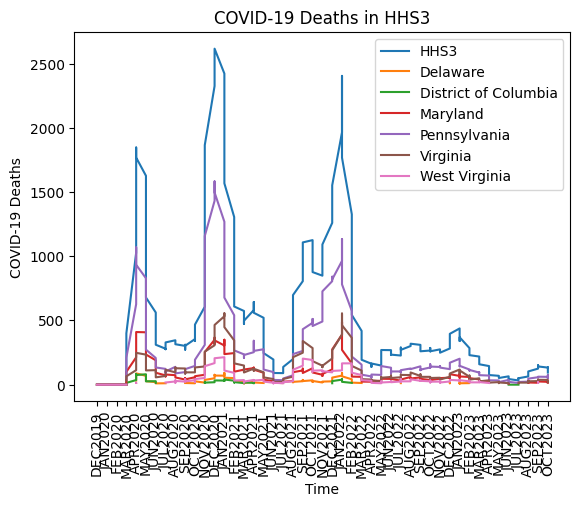

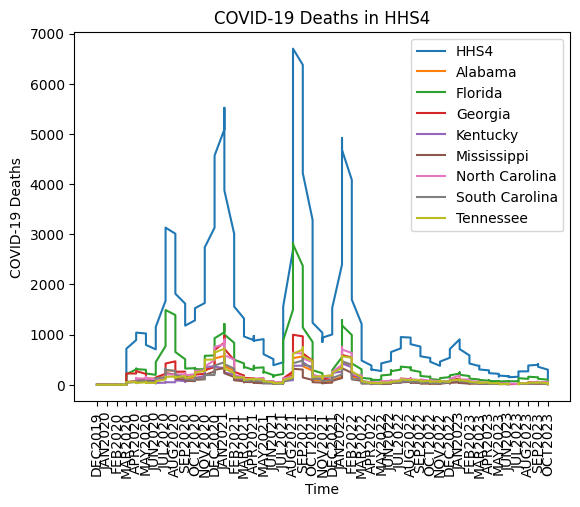

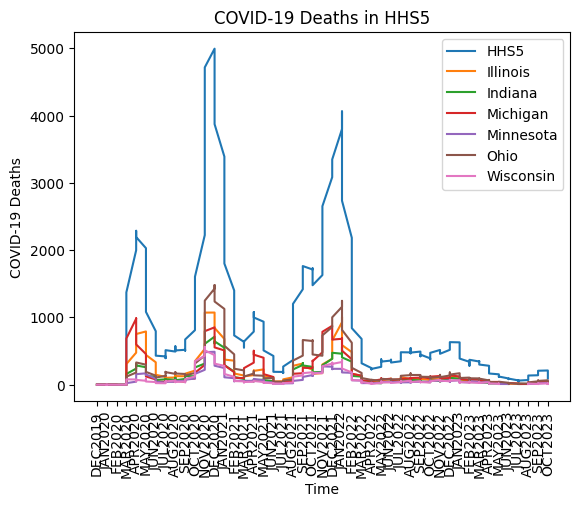

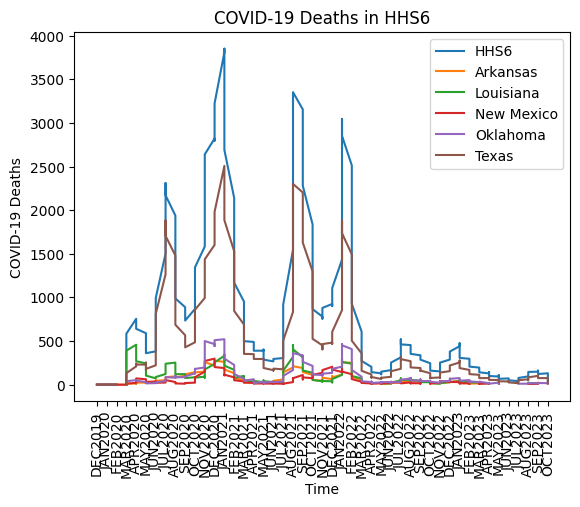

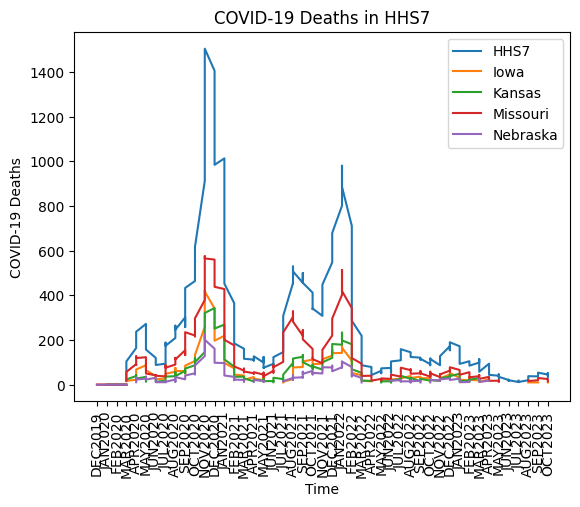

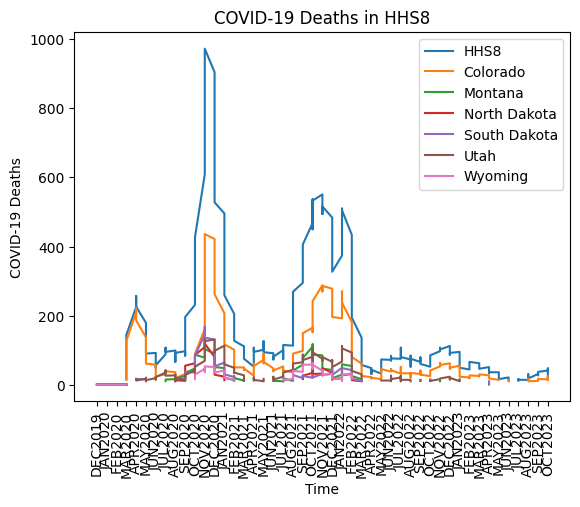

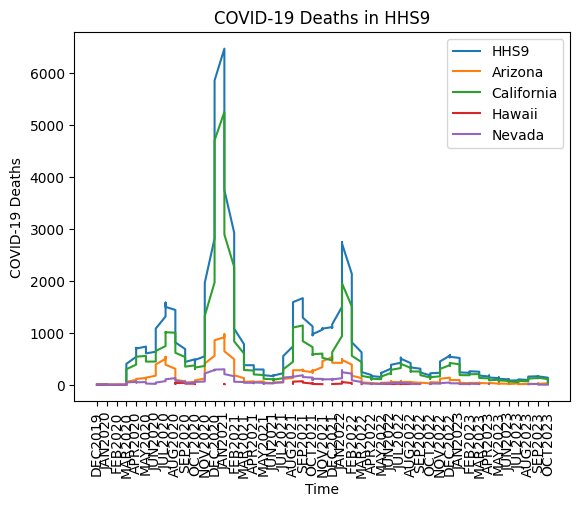

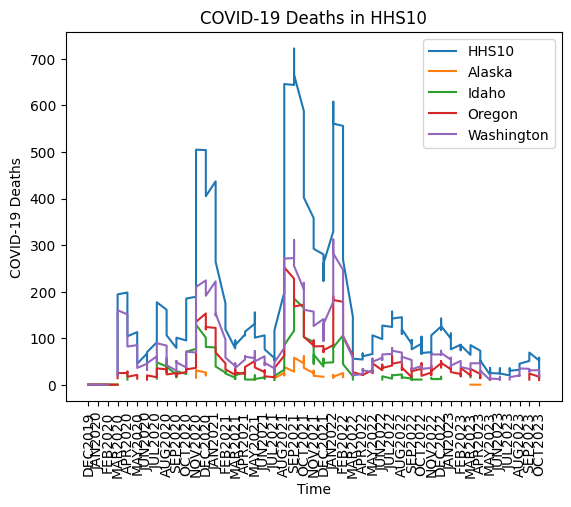

In [21]:
# Create a line plot for each individual HHS group, showing state contributions
hhs_datasets = [hhs1_df, hhs2_df, hhs3_df, hhs4_df, hhs5_df, hhs6_df, hhs7_df, hhs8_df, hhs9_df, hhs10_df]
hhs_keys = [i for i in hhs_regions.keys()]

for i in hhs_keys:
    current_data = hhs_datasets[hhs_keys.index(i)]
    plt.plot(current_data['Month Year'], current_data['COVID-19 Deaths'], label = i)
    for state in hhs_regions[i]:
        temp = df[(df['Jurisdiction'] == state) & (df['Age Group'] == 'All Ages')]
        plt.plot(temp['Month Year'], temp['COVID-19 Deaths'], label = state)

    plt.title(f'COVID-19 Deaths in {i}')
    plt.xlabel('Time')
    plt.xticks(rotation=90)
    plt.ylabel('COVID-19 Deaths')
    plt.legend()
    plt.show()

In [216]:
# Discovering discrpancies 
unique_dates = []
for date in cleaned_df['End Week']:
    if date not in unique_dates:
        unique_dates.append(date)

hhs_total = []
hhs_calc_total = []
hhs_difference = []
total_difference = []

for date in unique_dates:
    for hhs in hhs_keys:
        hhs_dataset = hhs_datasets[hhs_keys.index(hhs)]
        


['01/04/2020', '01/11/2020', '01/18/2020', '01/25/2020', '02/01/2020', '02/08/2020']
